# Notebook for comparison beween hi-class and Gevolution and agreement between class and hi-class

In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
tableau12 = [(0, 0, 0), (50, 0, 0), (0, 50, 0), (0, 0, 50),    
             (0, 50, 50), (50, 50, 0), (50, 0, 50), (50, 50, 50),    
             (100, 50, 50), (50, 100, 50), (50, 50, 100), (100, 100, 100)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau12)):    
    r, g, b = tableau12[i]    
    tableau12[i] = (r / 255., g / 255., b / 255.) 
    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
# plt.style.available
plt.rcParams.update(plt.rcParamsDefault)

# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'

# Adding files

In [3]:
backgr=np.loadtxt("./Gevolution_kessenc/lcdm_background.dat")

# Gevolution files for pi_k
piGev_z_100=np.loadtxt("./Gevolution_kessenc/lcdm_pk000_pi_k.dat")
piGev_z_10=np.loadtxt("./Gevolution_kessenc/lcdm_pk001_pi_k.dat")
piGev_z_3=np.loadtxt("./Gevolution_kessenc/lcdm_pk002_pi_k.dat")
piGev_z_0=np.loadtxt("./Gevolution_kessenc/lcdm_pk003_pi_k.dat")

# Gevolution files for pi_v
pivGev_z_100=np.loadtxt("./Gevolution_kessenc/lcdm_pk000_pi_v_k.dat")
pivGev_z_10=np.loadtxt("./Gevolution_kessenc/lcdm_pk001_pi_v_k.dat")
pivGev_z_3=np.loadtxt("./Gevolution_kessenc/lcdm_pk002_pi_v_k.dat")
pivGev_z_0=np.loadtxt("./Gevolution_kessenc/lcdm_pk003_pi_v_k.dat")

# Gevolution files for phi
phi_z_100=np.loadtxt("./Gevolution_kessenc/lcdm_pk000_phi.dat")
phi_z_10=np.loadtxt("./Gevolution_kessenc/lcdm_pk001_phi.dat")
phi_z_3=np.loadtxt("./Gevolution_kessenc/lcdm_pk002_phi.dat")
phi_z_0=np.loadtxt("./Gevolution_kessenc/lcdm_pk003_phi.dat")

# Original phi of Gevolution
phi_strd_z_100=np.loadtxt("./Standard_Gevolution/lcdm_pk000_phi.dat")
phi_strd_z_10=np.loadtxt("./Standard_Gevolution/lcdm_pk001_phi.dat")
phi_strd_z_3=np.loadtxt("./Standard_Gevolution/lcdm_pk002_phi.dat")
phi_strd_z_0=np.loadtxt("./Standard_Gevolution/lcdm_pk003_phi.dat")

# hiclass kessence field files in different redshift
hiclass_z100=np.loadtxt("./hiClass/kessence_gev_cs0z100.dat")
hiclass_z10=np.loadtxt("./hiClass/kessence_gev_cs0z10.dat")
hiclass_z3=np.loadtxt("./hiClass/kessence_gev_cs0z3.dat")
hiclass_z0=np.loadtxt("./hiClass/kessence_gev_cs0z0.dat")

# hiclass phi field files in different redshift
hiclass_phi_100=np.loadtxt("./hiClass/psi_hiclass_cs0z100_1.dat")
hiclass_phi_z10=np.loadtxt("./hiClass/psi_hiclass_cs0z10_2.dat")
hiclass_phi_z3=np.loadtxt("./hiClass/kessence_gev_cs0z3.dat")
hiclass_phi_z0=np.loadtxt("./hiClass/kessence_gev_cs0z0.dat")

#class powerspectra
class_z100=np.loadtxt("./Gevolution_kessenc/class_tk.dat")

# Background comparison

/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in divide
  import sys
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys
/Users/farbod/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


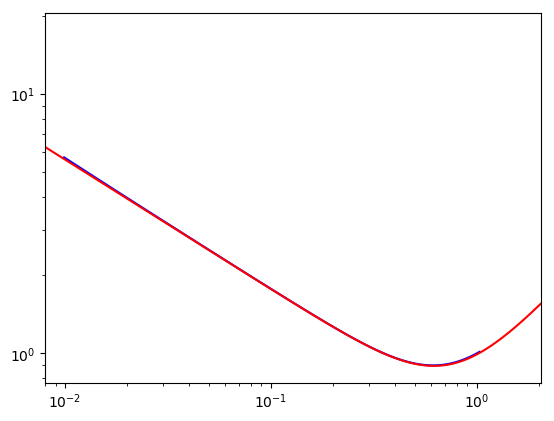

In [176]:
# a=backgr[:,2]
h=0.67556
Omega_m=0.312046;
Omega_kessence=0.67;
# (1-Omega_m-Omega_kessence)*a*a
a = np.arange(0., 15., 0.001)
myHa=np.sqrt(Omega_m/a+(Omega_kessence)*a**(-3*(1-0.9))*a*a)

plt.loglog(backgr[:,2],backgr[:,3],color="blue")
plt.loglog(a,myHa,color="red")

plt.xlim(0.008,2.05)
#plt.ylim(1.e-17,1.e-1)
plt.show()

# \pi_k dynamic from linear equation in Gevolution compared with hi-class

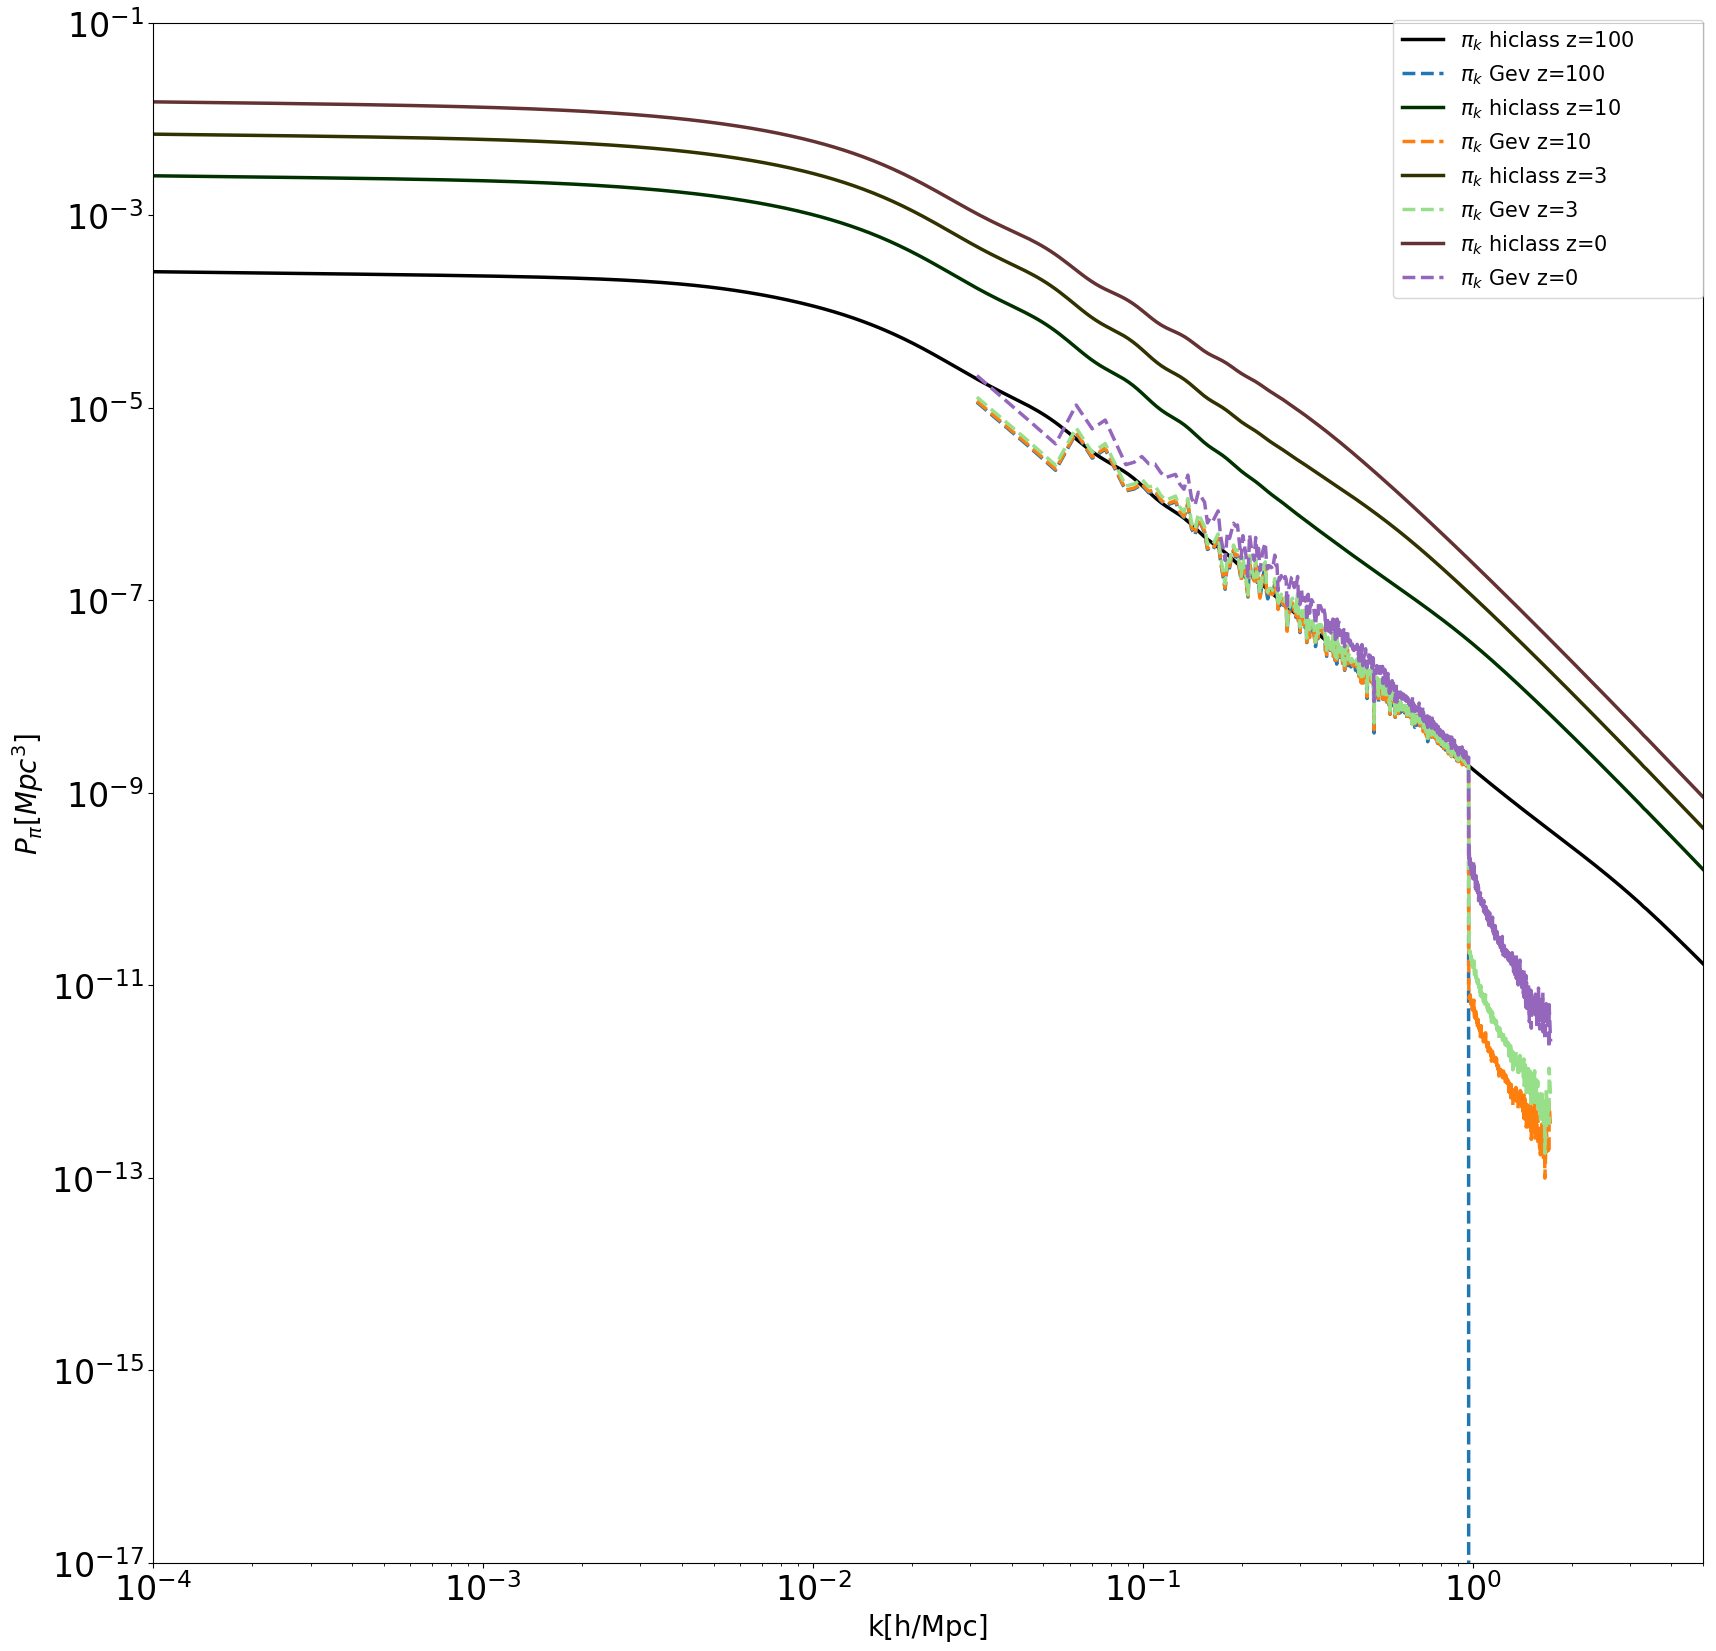

In [179]:
# params for makin power dimensionless
As=2.19*10**-9;
h=0.67;
kp=0.05/h; 
ns=0.96;

#Plot setting


plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

#Making related hi-class powerspectra
P_hiclass_z100_dimensionless=As*(hiclass_z100[:,1]**2)*((hiclass_z100[:,0]/kp)**(ns-1.));
P_hiclass_z10_dimensionless=As*(hiclass_z10[:,1]**2)*((hiclass_z10[:,0]/kp)**(ns-1.));
P_hiclass_z3_dimensionless=As*(hiclass_z3[:,1]**2)*((hiclass_z3[:,0]/kp)**(ns-1.));
P_hiclass_z0_dimensionless=As*(hiclass_z0[:,1]**2)*((hiclass_z0[:,0]/kp)**(ns-1.));

#Plots z=100
plt.plot(hiclass_z100[:,0],P_hiclass_z100_dimensionless[:],color=tableau12[0],linestyle='solid',lw=2.5,label=r"$\pi_k$ hiclass z=100 ")
plt.plot(piGev_z_100[:,0],piGev_z_100[:,1],color=tableau20[0],linestyle='dashed',lw=2.5,label=r"$\pi_k$ Gev z=100 ")
#Plots z=10
plt.plot(hiclass_z10[:,0],P_hiclass_z10_dimensionless[:],color=tableau12[2],linestyle='solid',lw=2.5,label=r"$\pi_k$ hiclass z=10 ")
plt.plot(piGev_z_10[:,0],piGev_z_10[:,1],color=tableau20[2],linestyle='dashed',lw=2.5,label=r"$\pi_k$ Gev z=10 ")
# #Plots z=3
plt.plot(hiclass_z3[:,0],P_hiclass_z3_dimensionless[:],color=tableau12[5],linestyle='solid',lw=2.5,label=r"$\pi_k$ hiclass z=3 ")
plt.plot(piGev_z_3[:,0],piGev_z_3[:,1],color=tableau20[5],linestyle='dashed',lw=2.5,label=r"$\pi_k$ Gev z=3 ")
# #Plots z=0
plt.plot(hiclass_z0[:,0],P_hiclass_z0_dimensionless[:],color=tableau12[8],linestyle='solid',lw=2.5,label=r"$\pi_k$ hiclass z=0 ")
plt.plot(piGev_z_0[:,0],piGev_z_0[:,1],color=tableau20[8],linestyle='dashed',lw=2.5,label=r"$\pi_k$ Gev z=0 ")

# Show the plots and save
plt.legend(bbox_to_anchor=(0.8, 0.90, 0.2, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale("log")
# plt.yscale('log')
plt.xlabel("k[h/Mpc]",fontsize=20)
plt.ylabel(r"$P_{\pi}[Mpc^3]$",fontsize=20)
plt.xlim(0.0001,5)
plt.ylim(1.e-17,1.e-1)
plt.savefig('pi_kcomparison.jpg', format='eps', dpi=1000)
plt.show()


# \pi_k dynamic from Nonlinear equation in Gevolution compared with hi-class

# \pi_v dynamic from Linear equation in Gevolution compared with hi-class

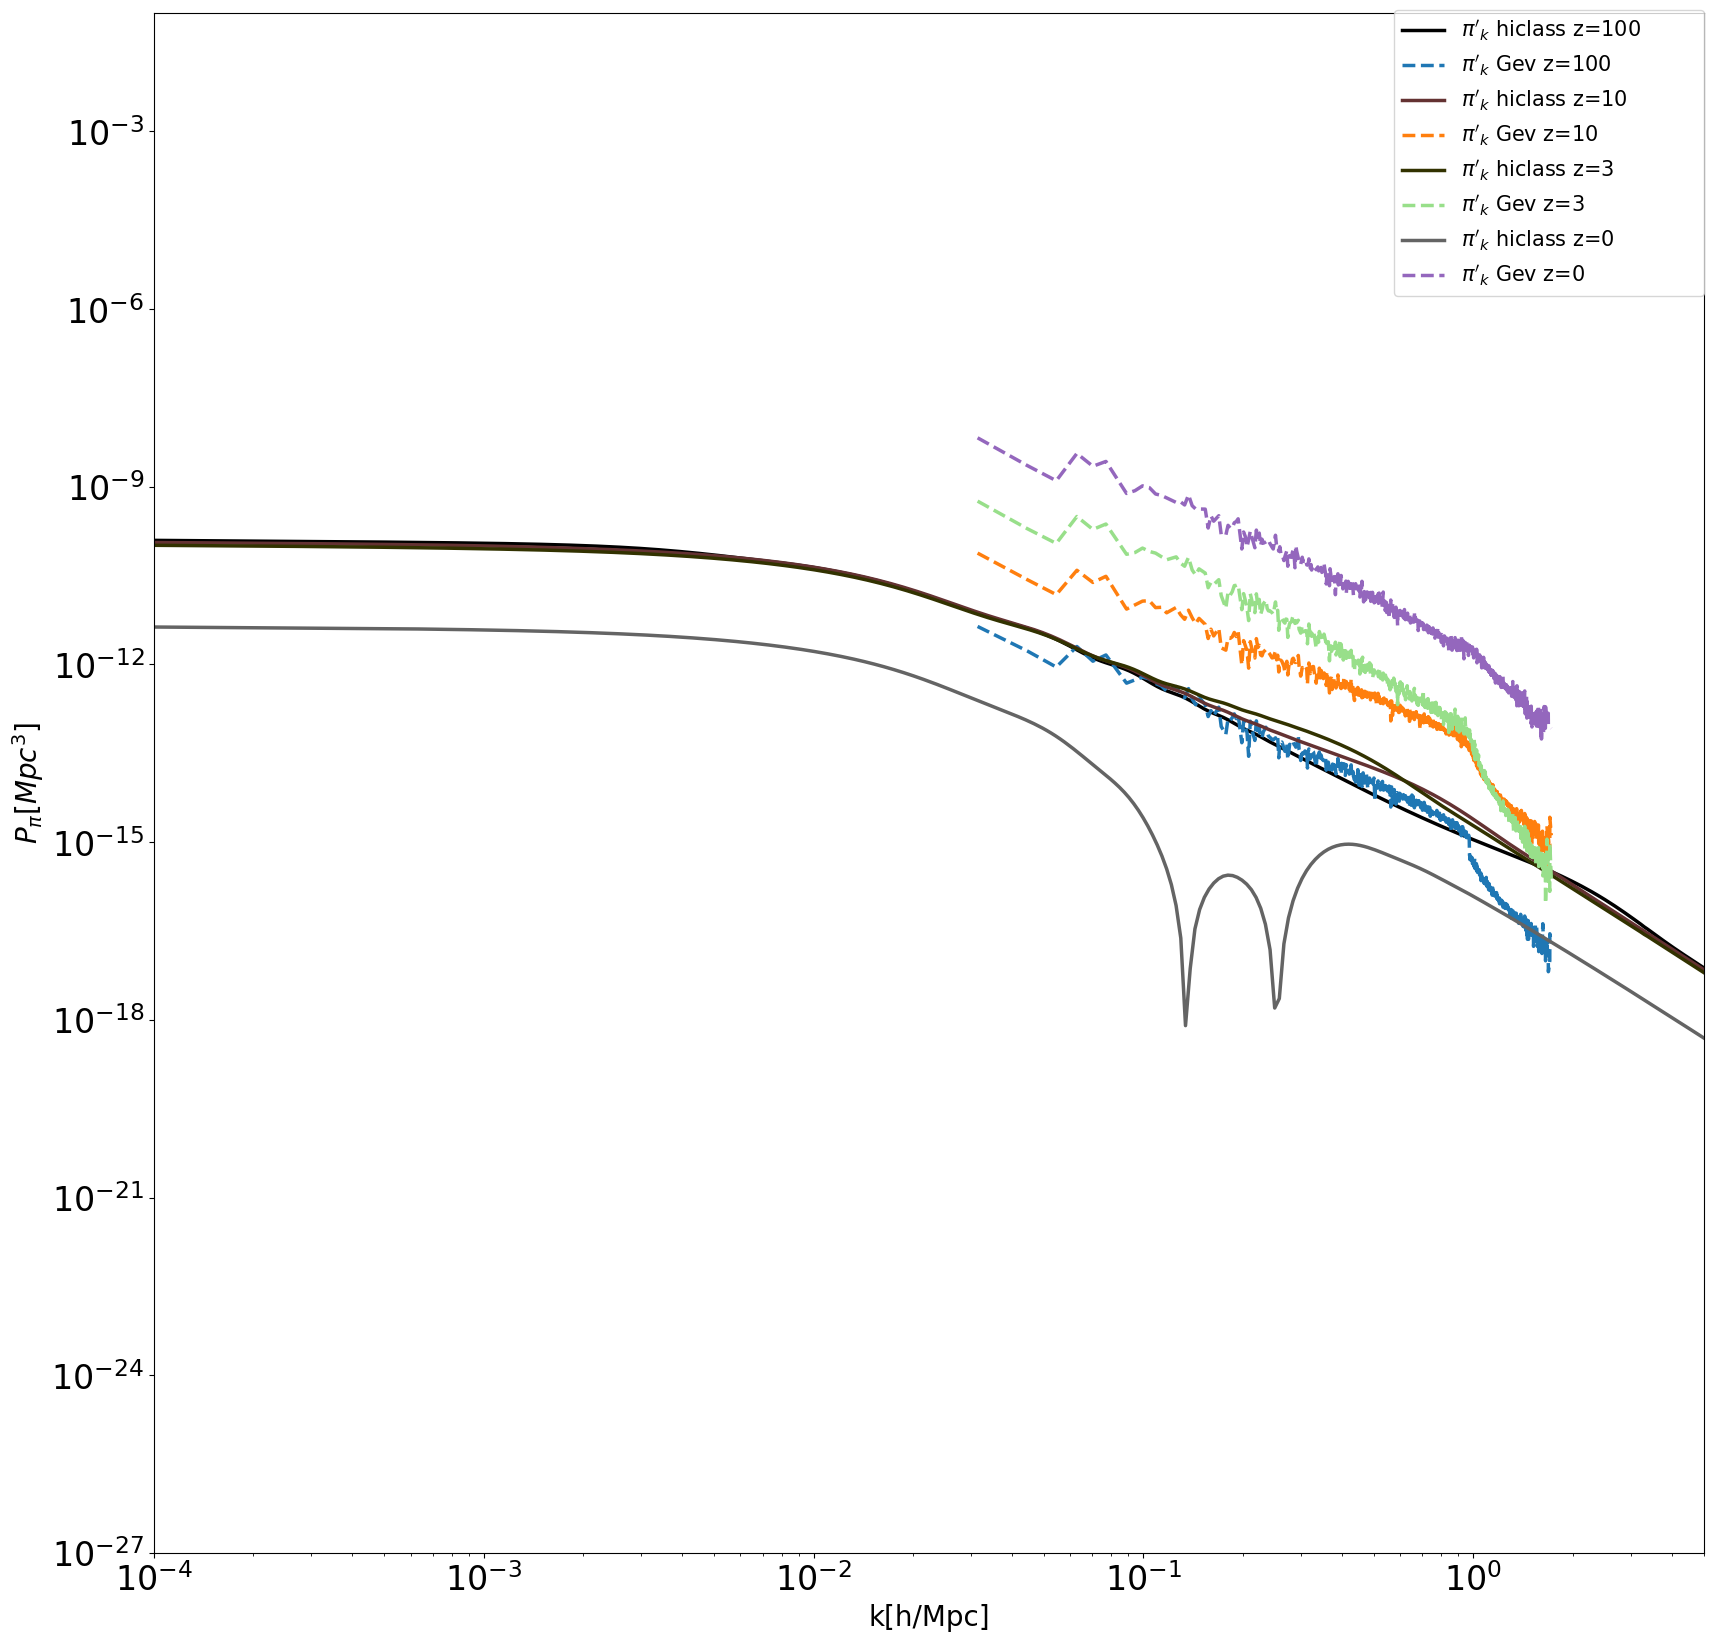

In [191]:
# params for makin power dimensionless
As=2.19*10**-9;
h=0.67;
kp=0.05/h; 
ns=0.96;

#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

#Making related hi-class powerspectra
Pv_hiclass_z100_dimensionless=As*(hiclass_z100[:,2]**2)*((hiclass_z100[:,0]/kp)**(ns-1.));
Pv_hiclass_z10_dimensionless=As*(hiclass_z10[:,2]**2)*((hiclass_z10[:,0]/kp)**(ns-1.));
Pv_hiclass_z3_dimensionless=As*(hiclass_z3[:,2]**2)*((hiclass_z3[:,0]/kp)**(ns-1.));
Pv_hiclass_z0_dimensionless=As*(hiclass_z0[:,2]**2)*((hiclass_z0[:,0]/kp)**(ns-1.));

#Plots z=100
plt.plot(hiclass_z100[:,0],Pv_hiclass_z100_dimensionless[:],color=tableau12[0],linestyle='solid',lw=2.5,label=r"$\pi'_k$ hiclass z=100 ")
plt.plot(pivGev_z_100[:,0],pivGev_z_100[:,1],color=tableau20[0],linestyle='dashed',lw=2.5,label=r"$\pi'_k$ Gev z=100 ")
#Plots z=10
plt.plot(hiclass_z10[:,0],Pv_hiclass_z10_dimensionless[:],color=tableau12[8],linestyle='solid',lw=2.5,label=r"$\pi'_k$ hiclass z=10 ")
plt.plot(pivGev_z_10[:,0],pivGev_z_10[:,1],color=tableau20[2],linestyle='dashed',lw=2.5,label=r"$\pi'_k$ Gev z=10 ")
# # #Plots z=3
plt.plot(hiclass_z3[:,0],Pv_hiclass_z3_dimensionless[:],color=tableau12[5],linestyle='solid',lw=2.5,label=r"$\pi'_k$ hiclass z=3 ")
plt.plot(pivGev_z_3[:,0],pivGev_z_3[:,1],color=tableau20[5],linestyle='dashed',lw=2.5,label=r"$\pi'_k$ Gev z=3 ")
# # #Plots z=0
plt.plot(hiclass_z0[:,0],Pv_hiclass_z0_dimensionless[:],color=tableau12[11],linestyle='solid',lw=2.5,label=r"$\pi'_k$ hiclass z=0 ")
plt.plot(pivGev_z_0[:,0],pivGev_z_0[:,1],color=tableau20[8],linestyle='dashed',lw=2.5,label=r"$\pi'_k$ Gev z=0 ")

# Show the plots and save
plt.legend(bbox_to_anchor=(0.8, 0.90, 0.2, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale("log")
# plt.yscale('log')
plt.xlabel("k[h/Mpc]",fontsize=20)
plt.ylabel(r"$P_{\pi}[Mpc^3]$",fontsize=20)
plt.xlim(0.0001,5)
plt.ylim(1.e-27,1.e-1)
plt.savefig('pi_kcomparison.jpg', format='eps', dpi=1000)
plt.show()

# \pi_v dynamic from Non-Linear equation in Gevolution compared with hi-class

# \phi comparison between class (output), hiclass (internally) and Gevolution 

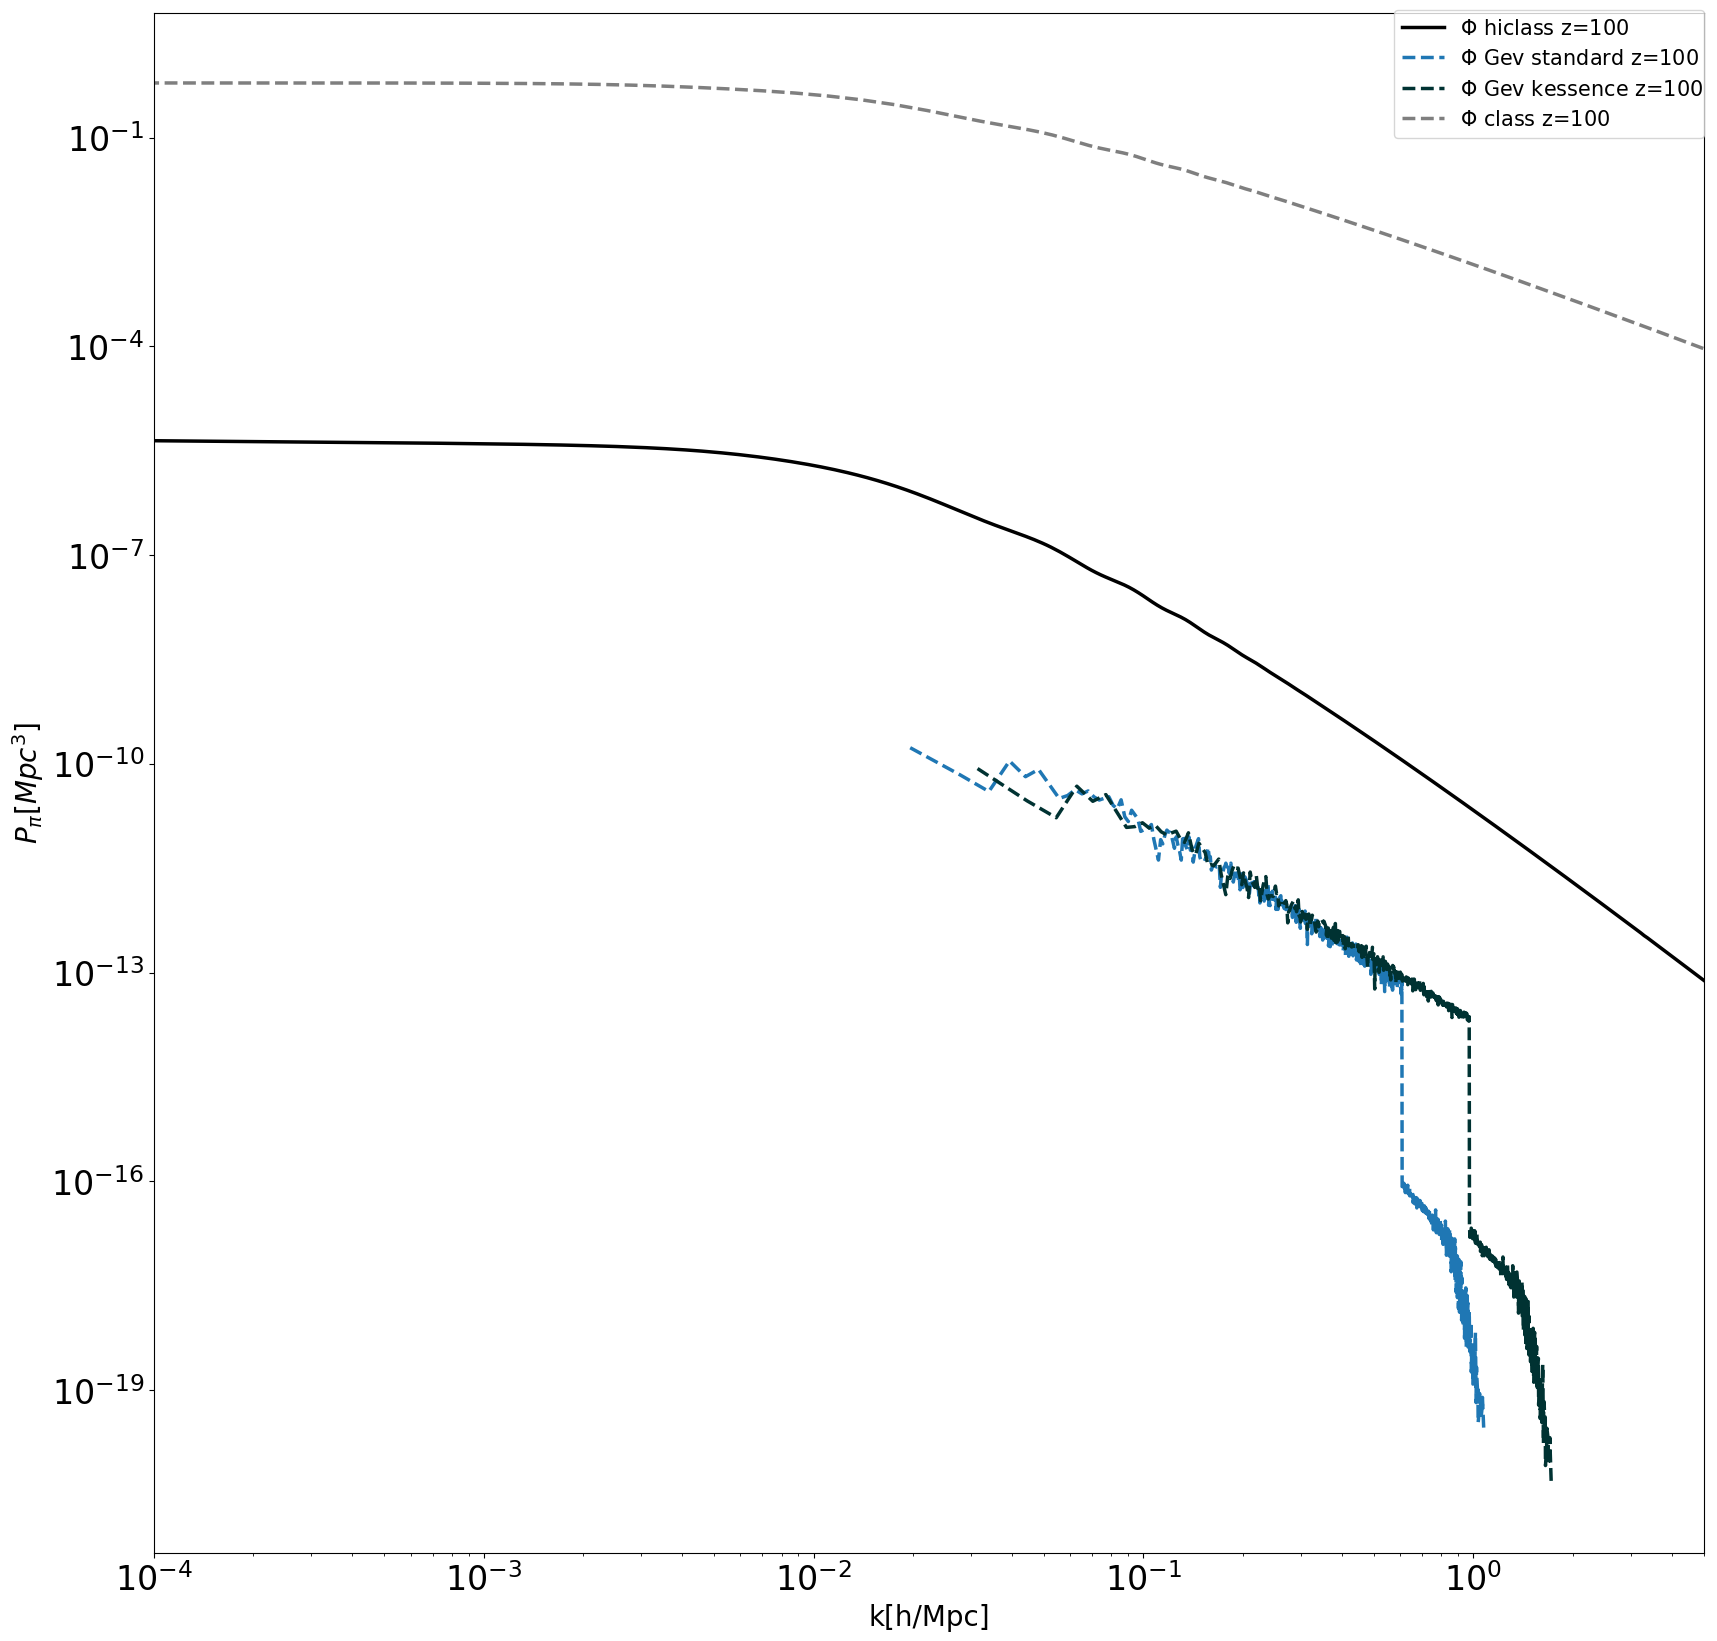

In [211]:

# params for makin power dimensionless
As=2.19*10**-9;
h=0.67;
kp=0.05/h; 
ns=0.96;

#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

#Making related hi-class powerspectra
Phi_class_dimensionless_z100=As*(hiclass_phi_100[:,1]**2)*((hiclass_phi_100[:,0]/kp)**(ns-1.));

#Plots z=100
plt.plot(hiclass_phi_100[:,0],hiclass_phi_100[:,2],color=tableau12[0],linestyle='solid',lw=2.5,label=r"$\Phi$ hiclass z=100 ")
plt.plot(phi_strd_z_100[:,0],phi_strd_z_100[:,1],color=tableau20[0],linestyle='dashed',lw=2.5,label=r"$\Phi$ Gev standard z=100 ")
plt.plot(phi_z_100[:,0],phi_z_100[:,1],color=tableau12[4],linestyle='dashed',lw=2.5,label=r"$\Phi$ Gev kessence z=100 ")
plt.plot(class_z100[:,0]*h,class_z100[:,6],color=tableau20[14],linestyle='dashed',lw=2.5,label=r"$\Phi$ class z=100 ")

#Plots z=10
# plt.plot(hiclass_z10[:,0],Pv_hiclass_z10_dimensionless[:],color=tableau12[8],linestyle='solid',lw=2.5,label=r"$\pi'_k$ hiclass z=10 ")
# plt.plot(pivGev_z_10[:,0],pivGev_z_10[:,1],color=tableau20[2],linestyle='dashed',lw=2.5,label=r"$\pi'_k$ Gev z=10 ")
# # #Plots z=3
# plt.plot(hiclass_z3[:,0],Pv_hiclass_z3_dimensionless[:],color=tableau12[5],linestyle='solid',lw=2.5,label=r"$\pi'_k$ hiclass z=3 ")
# plt.plot(pivGev_z_3[:,0],pivGev_z_3[:,1],color=tableau20[5],linestyle='dashed',lw=2.5,label=r"$\pi'_k$ Gev z=3 ")
# # #Plots z=0
# plt.plot(hiclass_z0[:,0],Pv_hiclass_z0_dimensionless[:],color=tableau12[11],linestyle='solid',lw=2.5,label=r"$\pi'_k$ hiclass z=0 ")
# plt.plot(pivGev_z_0[:,0],pivGev_z_0[:,1],color=tableau20[8],linestyle='dashed',lw=2.5,label=r"$\pi'_k$ Gev z=0 ")

# Show the plots and save
plt.legend(bbox_to_anchor=(0.8, 0.90, 0.2, .102), loc=1,ncol=1,fontsize=15, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale("log")
# plt.yscale('log')
plt.xlabel("k[h/Mpc]",fontsize=20)
plt.ylabel(r"$P_{\pi}[Mpc^3]$",fontsize=20)
plt.xlim(0.0001,5)
# plt.ylim(1.e-27,1.e-1)
plt.savefig('pi_kcomparison.jpg', format='eps', dpi=1000)
plt.show()




# Phi_class_dimensionless=As*(class_file[:,6]**2)*((class_file[:,0]/kp)**(ns-1.));
# Phi_class_z0=As*(class_phi_z_0[:,6]**2)*((class_phi_z_0[:,0]/kp)**(ns-1.));
# Phi_class_z100=As*(class_phi_z_100[:,6]**2)*((class_phi_z_100[:,0]/kp)**(ns-1.));
# hiclass_phi_100
# # plt.plot(class_file[:,0],Phi_class_dimensionless[:],color="red",label=r"$\Phi$ class z=100 ")
# plt.plot(phi_z_100[:,0],phi_z_100[:,1],color="black",label=r"$\Phi$ Gev z=100 ")
# plt.plot(phi_z_10[:,0],phi_z_10[:,1],color="blue",label=r"$\Phi$ Gev z=10 ")
# plt.plot(phi_z_3[:,0],phi_z_3[:,1],color="magenta",label=r"$\Phi$ Gev z=3 ")
# plt.plot(phi_z_0[:,0],phi_z_0[:,1],color="purple",label=r"$\Phi$ Gev z=0 ")
# # plt.plot(class_phi_z_0[:,0],Phi_class_z0[:],color="green",label=r"$\phi$, class z=0")
# # plt.plot(class_phi_z_100[:,0],Phi_class_z100[:],color="khaki",label=r"$\phi$, class z=100")

# # plt.plot(pi_class[:,0],P_class_dimensionless[:],color="green",label=r" z=3, hiclass")
# plt.legend(bbox_to_anchor=(0., 0.25, 0.4, .102), loc=1,ncol=1,fontsize=8, mode="expand", borderaxespad=0.)
# plt.xscale('log')
# plt.yscale("log")

# # plt.yscale('log')
# plt.xlabel("k[h/Mpc]")
# plt.ylabel(r"$P_{\Phi}[Mpc^3]$")
# plt.xlim(0.01,8)
# plt.ylim(1.e-18,1.e-11)

# plt.savefig('field_derivative_comparison.jpg',bbox_inches='tight')
# plt.show()
#Note: it seems Phi in class output is at z=0 not 100 both Gev and hi-class confirm this
# comparison of hi-class class also suggests that \psi in class is at z=0

# Class-hiclass \pi' and \pi in Newtonian gauge via formula

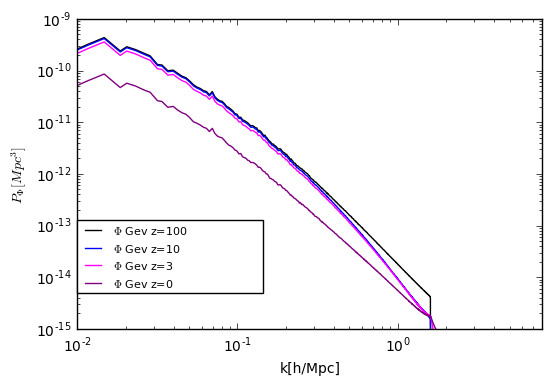

In [31]:
# h=0.67
# Hubb=2.25e-4;
# deltarho_newtc1=hiclass_cs1[:,2]
# alpha=(-class_synch[:111,4]+class_Newt[:111,4])
# deltarho_Synchc1=deltarho_newtc1-3e-4*Hubb*alpha;
# deltaR2=2*np.pi**2*As*(hiclass_cs0[:,0]/kp)**(ns-1)/((hiclass_cs0[:,0]/h)**(3./2.))As=2.19*10**-9;
h=0.67;
kp=0.05; 
ns=0.96;

Phi_class_dimensionless=As*(class_file[:,6]**2)*((class_file[:,0]/kp)**(ns-1.));
Phi_class_z0=As*(class_phi_z_0[:,6]**2)*((class_phi_z_0[:,0]/kp)**(ns-1.));
Phi_class_z100=As*(class_phi_z_100[:,6]**2)*((class_phi_z_100[:,0]/kp)**(ns-1.));

# plt.plot(class_file[:,0],Phi_class_dimensionless[:],color="red",label=r"$\Phi$ class z=100 ")
plt.plot(phib_z_100[:,0],phib_z_100[:,1],color="black",label=r"$\Phi$ Gev z=100 ")
plt.plot(phib_z_10[:,0],phib_z_10[:,1],color="blue",label=r"$\Phi$ Gev z=10 ")
plt.plot(phib_z_3[:,0],phib_z_3[:,1],color="magenta",label=r"$\Phi$ Gev z=3 ")
plt.plot(phib_z_0[:,0],phib_z_0[:,1],color="purple",label=r"$\Phi$ Gev z=0 ")
# plt.plot(class_phi_z_0[:,0],Phi_class_z0[:],color="green",label=r"$\phi$, class z=0")
# plt.plot(class_phi_z_100[:,0],Phi_class_z100[:],color="khaki",label=r"$\phi$, class z=100")

# plt.plot(pi_class[:,0],P_class_dimensionless[:],color="green",label=r" z=3, hiclass")
plt.legend(bbox_to_anchor=(0., 0.25, 0.4, .102), loc=1,ncol=1,fontsize=8, mode="expand", borderaxespad=0.)
plt.xscale('log')
plt.yscale("log")

# plt.yscale('log')
plt.xlabel("k[h/Mpc]")
plt.ylabel(r"$P_{\Phi}[Mpc^3]$")
plt.xlim(0.01,8)
plt.ylim(1.e-15,1.e-9)

# plt.savefig('field_derivative_9omparison.jpg',bbox_inches='tight')
plt.show()
#Note: it seems Phi in class output is at z=0 not 100 both Gev and hi-class confirm this
# comparison of hi-class class also suggests that \psi in class is at z=0

# Class-hiclass \pi' and \pi in Synchronous gauge via formula

# \delta_kessence power Comparison, Gevolution with hiclass and class.

# EFT CAMB and hiclass comparison in \pi \pi' transfer function